# Predicting Customer Satisfaction using Logistic Regression

In [5]:
import pandas as pd
df = pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Step 1: Data Preprocessing

In [6]:
df_cleaned = df.copy()
df_cleaned['satisfaction'] = df_cleaned['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
df_cleaned.dropna(inplace=True)

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

satisfaction = df_encoded.pop('satisfaction')
df_encoded['satisfaction'] = satisfaction
df_encoded.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,65,265,0,0,0,2,2,4,2,3,...,True,False,True,False,False,True,False,True,False,1.0
1,47,2464,0,0,0,3,0,2,2,3,...,False,True,True,False,False,True,True,False,False,1.0
2,15,2138,0,0,0,3,2,0,2,2,...,True,False,True,False,False,True,False,True,False,1.0
3,60,623,0,0,0,3,3,4,3,1,...,True,False,True,False,False,True,False,True,False,1.0
4,70,354,0,0,0,3,4,3,4,2,...,True,False,True,False,False,True,False,True,False,1.0


## Step 2: Split and Normalize

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert boolean columns to int for normalization
X = df_encoded.iloc[:, :-1].copy()
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)
X = X.values

y = df_encoded['satisfaction'].values.reshape(-1, 1)

X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Logistic Regression Functions

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

def accuracy(y_true, y_pred):
    return np.mean((y_pred >= 0.5) == y_true)

def logistic_regression(X_train, y_train, X_test, y_test, lr=0.01, iterations=1000):
    n_samples, n_features = X_train.shape
    weights = np.zeros((n_features, 1))
    losses = []

    for i in range(iterations):
        y_pred = predict(X_train, weights)
        loss = compute_loss(y_train, y_pred)
        losses.append(loss)

        gradient = np.dot(X_train.T, (y_pred - y_train)) / n_samples
        weights -= lr * gradient

    train_preds = predict(X_train, weights)
    test_preds = predict(X_test, weights)

    train_acc = accuracy(y_train, train_preds)
    test_acc = accuracy(y_test, test_preds)

    return weights, losses, train_acc, test_acc

## Step 4: Train the Model

In [9]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    w, losses, train_acc, test_acc = logistic_regression(X_train, y_train, X_test, y_test, lr=lr)
    results[lr] = {'weights': w, 'losses': losses, 'train_accuracy': train_acc, 'test_accuracy': test_acc}

summary = {
    'Learning Rate': [],
    'Final Training Accuracy': [],
    'Final Test Accuracy': []
}

for lr in learning_rates:
    summary['Learning Rate'].append(lr)
    summary['Final Training Accuracy'].append(results[lr]['train_accuracy'])
    summary['Final Test Accuracy'].append(results[lr]['test_accuracy'])

import pandas as pd
pd.DataFrame(summary)

,Learning Rate,Final Training Accuracy,Final Test Accuracy
0,0.1000,1.0,1.0
1,0.0100,1.0,1.0
2,0.0010,1.0,1.0
3,0.0001,1.0,1.0


## Step 5: Plot Loss vs Iterations

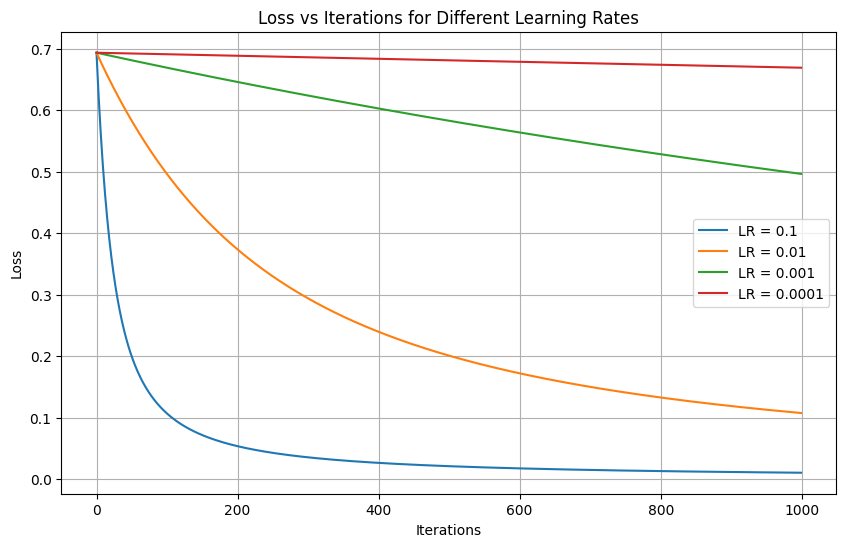

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(results[lr]['losses'], label=f"LR = {lr}")
plt.title("Loss vs Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()